In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Предобработка данных

In [7]:
# загрузим тренеровочный датасет
data = pd.read_csv('train.csv')

In [8]:
# оценим размерность датасета
print(f'Количество строк {data.shape[0]}, количество столбцов {data.shape[1]}')

Количество строк 42000, количество столбцов 785


In [9]:
# проверим датасет на пропуски
for k, v in enumerate(data.isna().sum()):
    if v != 0:
        print(f'В столбце {data.columns[k]}, {v} пропусков')

In [10]:
# проверить все ли колонки с типом данных int64
for column in data.columns:
    if data[column].dtype != 'int64':
        print( f'Изменить тип данных колонки {column}')

In [11]:
# найдем колонку с целевой переменной
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [12]:
# label - колонка с целевой переменной,
# посчитаем количество уникальных значений
for k, v in enumerate(data.label.value_counts(sort=False)):
    print(f'Значение {k} целевой переменной встречается {v} раз')

Значение 0 целевой переменной встречается 4132 раз
Значение 1 целевой переменной встречается 4684 раз
Значение 2 целевой переменной встречается 4177 раз
Значение 3 целевой переменной встречается 4351 раз
Значение 4 целевой переменной встречается 4072 раз
Значение 5 целевой переменной встречается 3795 раз
Значение 6 целевой переменной встречается 4137 раз
Значение 7 целевой переменной встречается 4401 раз
Значение 8 целевой переменной встречается 4063 раз
Значение 9 целевой переменной встречается 4188 раз


In [13]:
# сбалансируем значения целевой переменной
balanced = data.groupby('label')
balance_data = balanced.apply(lambda x: x.sample(balanced.size().min()).reset_index(drop=True))
balance_data['label'].value_counts()

9    3795
8    3795
7    3795
6    3795
5    3795
4    3795
3    3795
2    3795
1    3795
0    3795
Name: label, dtype: int64

In [14]:
# проверим сбалансированный датасет на неизменность пропусков
for k, v in enumerate(balance_data.isna().sum()):
    if v != 0:
        print(f'В столбце {balance_data.columns[k]}, {v} пропусков')
# проверим сбалансированный датасет на неизменность типа данных
for column in balance_data.columns:
    if balance_data[column].dtype != 'int64':
        print( f'Изменить тип данных колонки {column}')


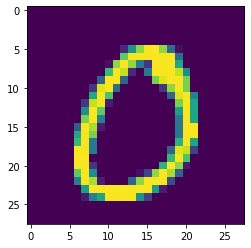

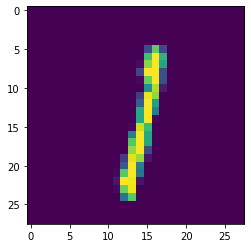

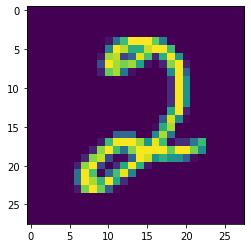

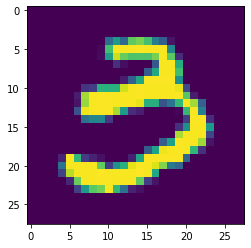

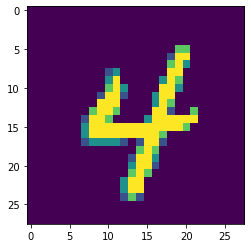

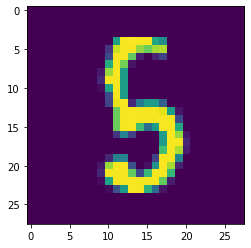

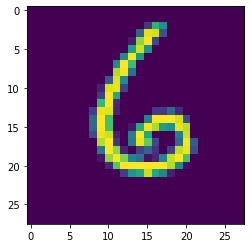

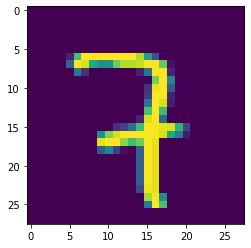

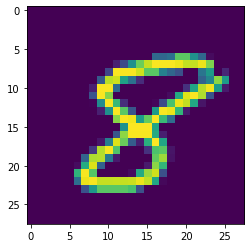

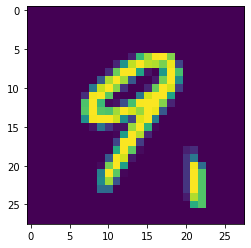

In [15]:
# сравним значение целевой переменной с графическим представлением
# матриц тренировочных данных
for i in range(10):
    image = balance_data[balance_data['label'] == i].iloc[0, 1:]
    plt.imshow(np.array(image).reshape(28,28))
    plt.show()

# Выбор алгоритма для модели

### DecisionTreeClassifier

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# разделим обучающую выборку и целевую переменную
X, Y = balance_data.drop(columns='label', axis=1), balance_data['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Accuracy DecisionTreeClassifier:  0.8455862977602108


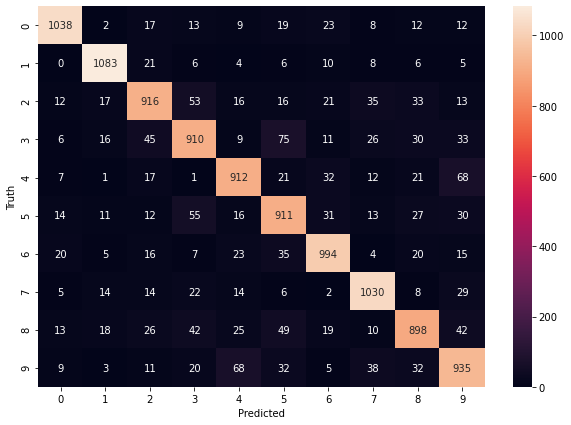

In [18]:
# обучим модель
Tree_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = Tree_model.predict(X_test)

# построим матрицу ошибок и получим метрику accuracy
plt.figure(figsize=(10,7))
cmd_tree = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd_tree ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy DecisionTreeClassifier: ', Tree_model.score(X_test, y_test))

### RandomForest
Алгоритм случайного леса должен повысить точность (Accuracy), поскольку его можно рассматривать как оптимизированную версию алгоритма Decision Tree

In [19]:
from sklearn.ensemble import RandomForestClassifier

# обучим модель
R_forest = RandomForestClassifier()
R_forest.fit(X_train, y_train);

In [20]:
y_pred_forest = R_forest.predict(X_test)

Accuracy RandomForest:  0.9596837944664032


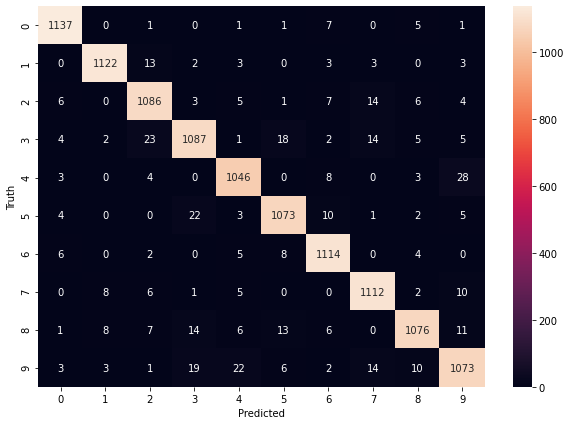

In [21]:
# построим матрицу ошибок и получим метрику accuracy
plt.figure(figsize=(10,7))
cmd_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cmd_forest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy RandomForest: ', R_forest.score(X_test, y_test))

### K nearest neighbors (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# обучим модель
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

In [23]:
y_pred_knn = knn.predict(X_test)

In [24]:
# оценим точность 

In [27]:
from sklearn.metrics import precision_score
precision_score(y_pred_knn, y_test, average=None)

array([0.99479618, 0.99042646, 0.94699647, 0.96037898, 0.96978022,
       0.95446429, 0.98770852, 0.97552448, 0.90805604, 0.94535993])